# Analysis of national vs. local domains

This file is the process of analyze the proportion of national vs. local news domains and their rank.
Data dependency: the datafile used in this analysis is generated from `natinoal_local_prepare_data.ipynb`.

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

In [188]:
# this file is generated from `natinoal_local_prepare_data.ipynb`.
df_category_grouped_class = pd.read_csv("../data/house_analysis/domain_rank_ishome_category_counts.csv")

In [190]:
# group domain, rank, and classification.
cat_class_rank_homecheck_counts = df_category_grouped_class.groupby(['category', 'classification', 'serp_rank', 'is_home_district'], dropna=False, as_index=False)['counts'].sum()

In [191]:
total_cnt = cat_class_rank_homecheck_counts['counts'].sum()

In [192]:
total_cnt

299573378

## Category counts

Connecting the domains with their categories.

In [193]:
cat_class_rank_homecheck_counts

,category,classification,serp_rank,is_home_district,counts
0,campaign_personal,national,21.0,False,2
1,campaign_personal,national,24.0,False,16
2,campaign_personal,national,27.0,False,2
3,campaign_personal,no_news,0.0,False,745
4,campaign_personal,no_news,0.0,True,1
...,...,...,...,...,...
1249,social,no_news,35.0,True,5
1250,social,no_news,36.0,False,503
1251,social,no_news,36.0,True,2
1252,social,no_news,37.0,False,20


In [194]:
category_counts = cat_class_rank_homecheck_counts.groupby(['category'], dropna=False, as_index=False).count()

In [195]:
category = cat_class_rank_homecheck_counts.groupby(['category'], dropna=False, as_index=False)['counts'].sum()

In [196]:
category['proportion'] = category['counts']/total_cnt

In [197]:
category

,category,counts,proportion
0,campaign_personal,17478882,0.058346
1,education,319956,0.001068
2,gov,55689950,0.185898
3,news,77207985,0.257726
4,other_third_party,59792451,0.199592
5,social,89084154,0.297370


<Axes: xlabel='category'>

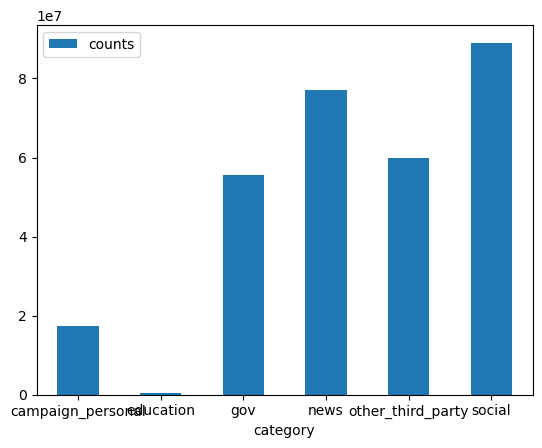

In [198]:
category.plot.bar(x='category', y='counts', rot=0)

# Analysis of news

Focus on news.

In [199]:
def check_is_news(col):
    if col == "news":
        return True
    else:
        return False

In [200]:
df_category_grouped_class['is_news'] = df_category_grouped_class['category'].apply(check_is_news)

In [201]:
df_category_grouped_class = df_category_grouped_class.drop_duplicates()

In [202]:
df_category_grouped_class['counts'].sum()

299573378

In [203]:
df_category_grouped_class

,domain,serp_rank,is_home_district,category,counts,classification,is_news
0,1011now.com,2.0,False,news,2,local,True
1,1011now.com,3.0,False,news,13,local,True
2,1011now.com,4.0,False,news,1200,local,True
3,1011now.com,5.0,False,news,6503,local,True
4,1011now.com,5.0,True,news,18,local,True
...,...,...,...,...,...,...,...
94153,zoelofgren.com,21.0,False,campaign_personal,446,NaN,False
94154,zoelofgren.com,21.0,True,campaign_personal,1,NaN,False
94155,zoelofgren.com,22.0,False,campaign_personal,27,NaN,False
94156,zoelofgren.com,23.0,False,campaign_personal,435,NaN,False


## what proportion are local

Check the proportion of local domains in the general search results.

### General local vs. national domain

In [204]:
total_class_grouped = df_category_grouped_class.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [205]:
total_class_grouped['rate']=total_class_grouped['counts']/total_cnt

In [206]:
total_class_grouped['counts'].sum()

299573378

In [207]:
total_class_grouped

,classification,counts,rate
0,local,65130979,0.217412
1,national,20414417,0.068145
2,no_news,185064376,0.617760
3,other news,2434184,0.008126
4,NaN,26529422,0.088557


In [208]:
coverage_rate_general = total_class_grouped[~total_class_grouped["classification"].isna()]['counts'].sum()/total_class_grouped['counts'].sum()

In [209]:
coverage_rate_general

0.9114426582992298

In [210]:
# coverage rate in domain
len(df_category_grouped_class.dropna().groupby(['domain'], dropna=True, as_index=False)['counts'].sum())/4220

0.6210900473933649

### Local vs. national news

Check the proportion in news. This is based on the hypothesis that news are more sensitive to local and national. Also, this relates to the debate of whether local news are diminished.

In [211]:
news_only = df_category_grouped_class[df_category_grouped_class['is_news']==True]

In [212]:
news_only

,domain,serp_rank,is_home_district,category,counts,classification,is_news
0,1011now.com,2.0,False,news,2,local,True
1,1011now.com,3.0,False,news,13,local,True
2,1011now.com,4.0,False,news,1200,local,True
3,1011now.com,5.0,False,news,6503,local,True
4,1011now.com,5.0,True,news,18,local,True
...,...,...,...,...,...,...,...
94068,zanesvilletimesrecorder.com,6.0,False,news,1267,local,True
94069,zanesvilletimesrecorder.com,6.0,True,news,2,local,True
94070,zanesvilletimesrecorder.com,7.0,False,news,1221,local,True
94071,zanesvilletimesrecorder.com,7.0,True,news,4,local,True


In [213]:
news_total = news_only['counts'].sum()

In [214]:
class_grouped = news_only.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [215]:
class_grouped['rate'] = class_grouped['counts']/news_total

In [216]:
class_grouped

,classification,counts,rate
0,local,49203309,0.637283
1,national,19063433,0.246910
2,no_news,213573,0.002766
3,other news,2434184,0.031528
4,NaN,6293486,0.081513


In [217]:
coverage_rate_news = class_grouped[~class_grouped["classification"].isna()]['counts'].sum()/class_grouped['counts'].sum()

In [218]:
coverage_rate_news

0.9184865917689731

In [219]:
# coverage rate in domain
len(news_only.dropna().groupby(['domain'], dropna=True, as_index=False)['counts'].sum())/len(news_only.groupby(['domain'], dropna=True, as_index=False))

0.7704572803850782

## rank of non_news, local, and national

Check what category of news is google prioritizing.

In [220]:
def label_non_local_national(row):
    if not row['is_news']:
        return 'no_news'
    else:
        return row['classification']

In [221]:
df_category_grouped_class['label'] = df_category_grouped_class.apply(label_non_local_national, axis=1)

In [224]:
label_grouped = df_category_grouped_class.groupby(['label', 'serp_rank'], dropna=True, as_index=False)['counts'].sum()

In [226]:
label_grouped['rank'] = label_grouped['serp_rank']+1

In [227]:
label_grouped_matrix = label_grouped.pivot_table(index='label', columns='rank', values='counts')

In [228]:
# Calculate the sum of each row
label_grouped_matrix['row_sum'] = label_grouped_matrix.sum(axis=1)

# Sort the DataFrame by the sum of each row
label_grouped_matrix_sorted = label_grouped_matrix.sort_values(by='row_sum', ascending=False)

# Drop the 'row_sum' column for heatmap
label_grouped_matrix_sorted = label_grouped_matrix_sorted.drop(columns='row_sum')

In [229]:
label_grouped_matrix_sorted_norm = label_grouped_matrix_sorted.div(label_grouped_matrix_sorted.sum(axis=1), axis=0)

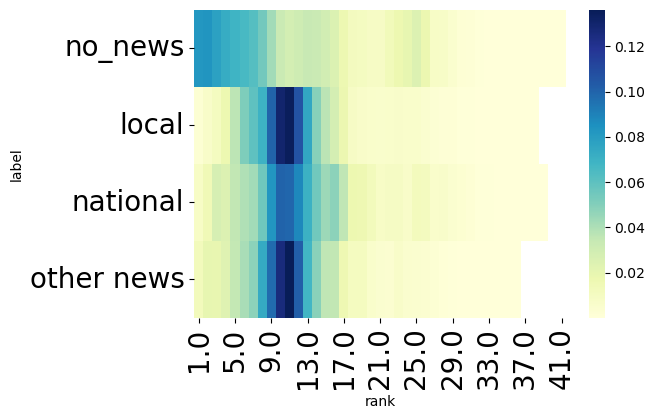

In [230]:
fig, ax = plt.subplots(figsize=(6,4)); 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(label_grouped_matrix_sorted_norm , cmap='YlGnBu', annot=False, fmt='0.0f')
plt.savefig("../data/plots/domain_label_rank_norm.png", bbox_inches='tight', dpi=200) 
plt.show()

## Calculate average rank for each label

Get the average rank for each calssification of local vs. naitonal news

In [231]:
label_grouped

,label,serp_rank,counts,rank
0,local,0.0,133136,1.0
1,local,1.0,350921,2.0
2,local,2.0,533646,3.0
3,local,3.0,858637,4.0
4,local,4.0,1797033,5.0
...,...,...,...,...
149,other news,31.0,291,32.0
150,other news,32.0,456,33.0
151,other news,33.0,78,34.0
152,other news,34.0,27,35.0


In [232]:
local = label_grouped[label_grouped['label']=='local']


In [233]:
local_news_avg_rank = sum(local['rank']*local['counts'])/local['counts'].sum()

In [235]:
local_news_avg_rank

11.014828250677205

In [236]:
national = label_grouped[label_grouped['label']=='national']

In [237]:
national_news_avg_rank = sum(national['rank']*national['counts'])/national['counts'].sum()

In [238]:
national_news_avg_rank

11.957381653136663

## local vs. other place

This analysis compares the local news composition of search from a member's home district vs. other districts.

In [239]:
local = df_category_grouped_class[df_category_grouped_class['is_home_district']==True]

In [240]:
local_news_only = local[local['is_news']==True]

In [241]:
local_news_total = local_news_only['counts'].sum()

In [242]:
local_class_grouped = local_news_only.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [243]:
local_class_grouped['rate'] = local_class_grouped['counts']/local_news_total

In [244]:
local_class_grouped

,classification,counts,rate
0,local,111914,0.639838
1,national,42932,0.245452
2,no_news,475,0.002716
3,other news,5383,0.030776
4,NaN,14206,0.081219


In [253]:
0.002716+0.002716+0.081219

0.086651

In [246]:
other = df_category_grouped_class[df_category_grouped_class['is_home_district']==False]

In [247]:
other_news_only = other[other['is_news']==True]

In [248]:
other_news_total = other_news_only['counts'].sum()

In [249]:
other_class_grouped = other_news_only.groupby(['classification'], dropna=False, as_index=False)['counts'].sum()

In [250]:
other_class_grouped['rate'] = other_class_grouped['counts']/other_news_total

In [251]:
other_class_grouped

,classification,counts,rate
0,local,49091395,0.637277
1,national,19020501,0.246913
2,no_news,213098,0.002766
3,other news,2428801,0.031529
4,NaN,6279280,0.081514


In [254]:
0.002766+0.031529+0.081514

0.115809